### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [406]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [407]:
data = pd.read_csv('data/coupons.csv')

In [408]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [409]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

Data shape of original data: (12684, 26)
% of null data in car	: 99.15%
% of null data in Bar	: 0.84%
% of null data in CoffeeHouse	: 1.71%
% of null data in CarryAway	: 1.19%
% of null data in RestaurantLessThan20	: 1.02%
% of null data in Restaurant20To50	: 1.49%

99% of the data in the column 'car' is null. We can drop this column as it does not provide any useful information for our analysis.
Also, we can drop the rows with null values in the other columns ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] as they are not significant in number. They are only ~1% of the data.

Data shape after removing missing data columns/rows: (12079, 25)


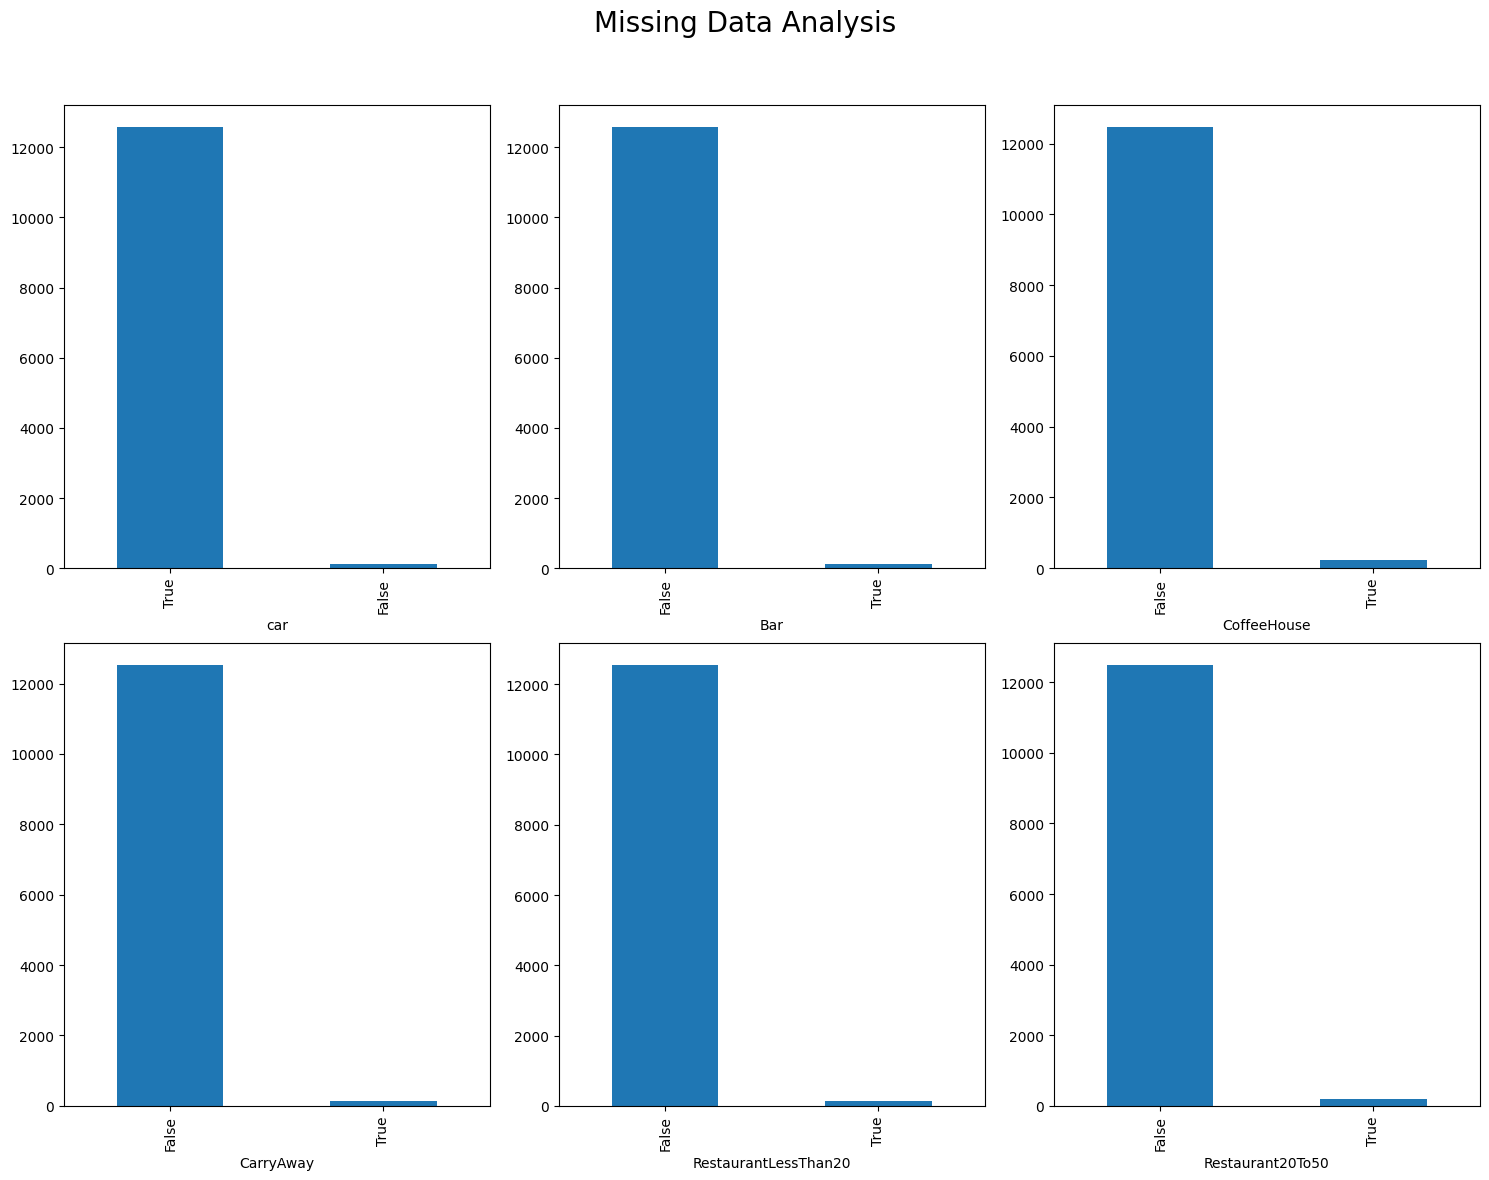

In [410]:
print("Data shape of original data: {}".format(data.shape))

plt.figure(figsize=(15, 12))
plt.suptitle('Missing Data Analysis', fontsize=20)
for i, col in enumerate(['car','Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']):
    ax = plt.subplot(2, 3, i + 1)
    nullData_percentage = data[col].isna().mean()*100
    print("% of null data in {}\t: {:.2f}%".format(col, nullData_percentage))
    data[col].isna().value_counts().plot(kind='bar', ax=ax)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('images/missing_data_analysis.png')

dataAnalysis="""
99% of the data in the column 'car' is null. We can drop this column as it does not provide any useful information for our analysis.
Also, we can drop the rows with null values in the other columns ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] as they are not significant in number. They are only ~1% of the data.
"""
print(dataAnalysis)

clean_data = data.drop('car', axis=1).dropna()
clean_data.isna().sum()
print("Data shape after removing missing data columns/rows: {}".format(clean_data.shape))

4. What proportion of the total observations chose to accept the coupon?



In [411]:
total_acceptance=clean_data['Y'].value_counts(normalize=True) * 100
print(total_acceptance)
print(f"proportion of the total observations chose to accept the coupon: {total_acceptance[1]:.2f}%")

Y
1    56.933521
0    43.066479
Name: proportion, dtype: float64
proportion of the total observations chose to accept the coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

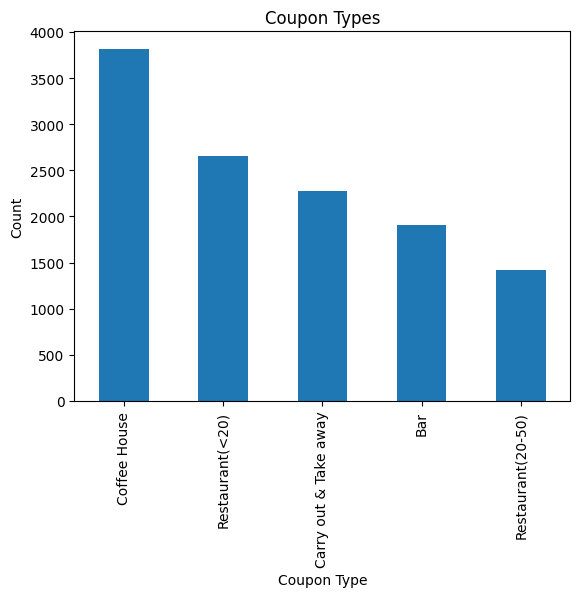

In [412]:
clean_data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.savefig('images/coupon_type_counts.png')

6. Use a histogram to visualize the temperature column.

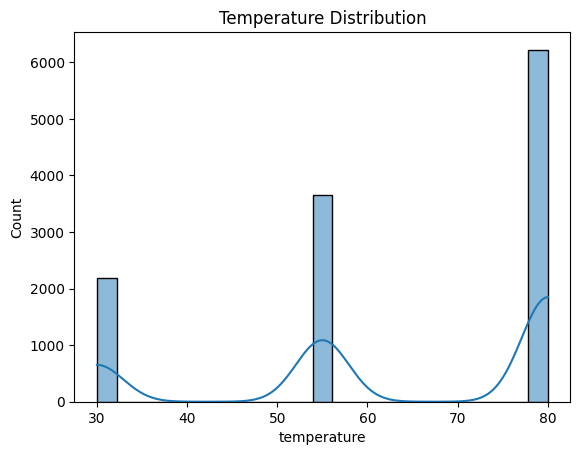

In [413]:
sns.histplot(clean_data, x='temperature', kde=True)
plt.title('Temperature Distribution')
plt.savefig('images/temperature_distribution.png')

In [414]:
def get_income_hign_range(income):
    if "Less than" in income:  # Less than $12500
        return 12499
    elif "or More" in income:  # $100000 or More
        return 100000
    else:
        # extract numeric values from the range
        highLow = income.replace('$', '').split(" - ")
        return highLow[1] # return the upper limit 

#Adding a new column for income upperbound values
clean_data.loc[:,'incomeHigh'] = clean_data['income'].map(get_income_hign_range).astype(int)

#Remapping age values to numeric values
clean_data.loc[:,'age'] = clean_data['age'].map({'50plus': 50,'below21': 20}).fillna(clean_data['age']).astype(int)

#Remapping all the categorical values to numeric values
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
  clean_data.loc[:,col] = clean_data[col].map({'never': 0, 'less1': 0, '1~3': 3, '4~8': 8, 'gt8': 9})
  clean_data.loc[:,col] = clean_data[col].astype(int)
  print("Unique values in col {} : {}".format(col,clean_data[col].unique()))
print("Unique values in col age : {}".format(clean_data['age'].unique()))
print("Unique values in col incomeHigh : {}".format(clean_data['incomeHigh'].unique()))

Unique values in col Bar : [0 3 9 8]
Unique values in col CoffeeHouse : [0 8 3 9]
Unique values in col CarryAway : [8 3 9 0]
Unique values in col RestaurantLessThan20 : [8 3 0 9]
Unique values in col Restaurant20To50 : [0 3 9 8]
Unique values in col age : [21 46 26 31 41 50 36 20]
Unique values in col incomeHigh : [ 74999  24999  87499  62499  49999  37499 100000  99999  12499]


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [415]:
bar_coupon = clean_data.query('coupon == "Bar"')
print(bar_coupon.shape)
bar_coupon.head()

(1913, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,incomeHigh
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,8,8,0,1,0,0,0,1,1,74999
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,8,8,0,1,0,0,1,0,1,74999
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,8,8,0,1,1,1,0,1,1,74999
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,3,3,0,1,0,0,0,1,0,24999
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,3,3,0,1,0,0,1,0,0,24999


2. What proportion of bar coupons were accepted?


In [416]:
# Calculate acceptance rates for bar coupons
acceptance_rate_bar_coupon = bar_coupon['Y'].value_counts(normalize=True) * 100
print("Proportion of bar coupons were accepted: {:.2f}%".format(acceptance_rate_bar_coupon.values[1]))
fig =px.bar(acceptance_rate_bar_coupon, y='proportion', title='Acceptance Rate for Bar Coupons').show()

Proportion of bar coupons were accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [417]:
acceptance_rate_by_barFrequency = (bar_coupon.groupby(lambda x: ">3" if bar_coupon['Bar'].loc[x] > 3 else "<3")['Y'].value_counts(normalize=True) * 100).unstack()

print(acceptance_rate_by_barFrequency)
print(f"Who went to a bar 3 or fewer times a month\t: {acceptance_rate_by_barFrequency.iloc[0,1]:.2f}%")
print(f"Who went to a bar more than 3 times a month\t: {acceptance_rate_by_barFrequency.iloc[1,1]:.2f}%")

Y           0          1
<3  62.732558  37.267442
>3  23.834197  76.165803
Who went to a bar 3 or fewer times a month	: 37.27%
Who went to a bar more than 3 times a month	: 76.17%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [418]:
acceptance_rate_moreThanOnceToBarAndOlderThan25 = bar_coupon.query('Bar > 1 and age > 25')['Y'].mean() * 100
print(f"Who go to a bar more than once a month and are over the age of 25: {acceptance_rate_moreThanOnceToBarAndOlderThan25:.2f}%")

Who go to a bar more than once a month and are over the age of 25: 68.98%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [419]:
moreThanOnceToBarAndNoKidsAndNotFarming = bar_coupon.query('Bar > 1 and passanger != "Kid(s)" and occupation not in ["Farming Fishing & Forestry"]')['Y'].value_counts(normalize=True) * 100
print(moreThanOnceToBarAndNoKidsAndNotFarming)
print(f"Who go to bars more than once a month and had passengers that were not a kid and \nhad occupations other than farming, fishing, or forestry: {moreThanOnceToBarAndNoKidsAndNotFarming.values[0]:.2f}%")

Y
1    70.943396
0    29.056604
Name: proportion, dtype: float64
Who go to bars more than once a month and had passengers that were not a kid and 
had occupations other than farming, fishing, or forestry: 70.94%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [420]:
acceptance_rate_moreThanOnceToBarAndNoKidsAndWidowed = bar_coupon.query('Bar > 1 and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"]')['Y'].mean() * 100
acceptance_rates_moreThanOnceToBarAndYoungerThan30 = bar_coupon.query('Bar > 1 and age < 30')['Y'].mean() * 100
acceptance_rates_goesToCheapRestaurantsAndIncomeLessThan50K = bar_coupon.query('RestaurantLessThan20 > 3 and incomeHigh < 50000')['Y'].mean() * 100

print(f"who go to bars more than once a month, had passengers that were not a kid, and were not widowed\t\t: {acceptance_rate_moreThanOnceToBarAndNoKidsAndWidowed:.2f}%")
print(f"who go to bars more than once a month and are under the age of 30\t\t\t\t\t: {acceptance_rates_moreThanOnceToBarAndYoungerThan30:.2f}%")
print(f"who go to cheap restaurants more than 4 times a month and income is less than 50K\t\t\t: {acceptance_rates_goesToCheapRestaurantsAndIncomeLessThan50K:.2f}%")

who go to bars more than once a month, had passengers that were not a kid, and were not widowed		: 70.94%
who go to bars more than once a month and are under the age of 30					: 71.95%
who go to cheap restaurants more than 4 times a month and income is less than 50K			: 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [421]:
hypothesis="""
Drivers who go to bars more than once a month and are under the age of 30 are more likely to accept the coupon than those who are older than 30.
Marital status and occupation does not seem to have a significant impact on the acceptance rate of the coupon for drivers who go to bars more than once a month.
Acceptance rate decreases for drivers who are older than 30 and go to bars more than once a month.
"""
print("Hypothesis: {}".format(hypothesis))

Hypothesis: 
Drivers who go to bars more than once a month and are under the age of 30 are more likely to accept the coupon than those who are older than 30.
Marital status and occupation does not seem to have a significant impact on the acceptance rate of the coupon for drivers who go to bars more than once a month.
Acceptance rate decreases for drivers who are older than 30 and go to bars more than once a month.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [422]:
coffee_coupon = clean_data.query('coupon == "Coffee House"')
coffee_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,incomeHigh
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,8,8,0,1,0,0,0,1,0,74999
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,8,8,0,1,0,0,0,1,0,74999
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,8,8,0,1,1,0,0,1,0,74999
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,8,8,0,1,1,0,0,1,0,74999
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,8,8,0,1,0,0,0,1,0,74999


In [423]:
coffee_coupon_acceptance_rate = coffee_coupon['Y'].value_counts(normalize=True) * 100
print(coffee_coupon_acceptance_rate)
px.bar(coffee_coupon_acceptance_rate, y='proportion', title='Acceptance Rate for Coffee House Coupons').show()

Y
0    50.366876
1    49.633124
Name: proportion, dtype: float64


In [424]:

acceptance_rate_moreThanOnceToCoffeeHouseAndNoKidsAndWidowed = coffee_coupon.query('CoffeeHouse > 1 and passanger not in ["Kid(s)"] and maritalStatus not in ["Widowed"]')['Y'].mean() * 100
acceptance_rates_moreThanOnceToCoffeeHouseAndYoungerThan30 = coffee_coupon.query('CoffeeHouse > 1 and age < 30')['Y'].mean() * 100
acceptance_rates_goesToCheapRestaurantsAndIncomeLessThan50K1 = coffee_coupon.query('RestaurantLessThan20 > 3 and incomeHigh < 50000')['Y'].mean() * 100
print(f"who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed\t: {acceptance_rate_moreThanOnceToCoffeeHouseAndNoKidsAndWidowed:.2f}%")
print(f"who go to coffee houses more than once a month and are under the age of 30\t\t\t\t\t: {acceptance_rates_moreThanOnceToCoffeeHouseAndYoungerThan30:.2f}%")       
print(f"who go to cheap restaurants more than 4 times a month and income is less than 50K\t\t\t\t: {acceptance_rates_goesToCheapRestaurantsAndIncomeLessThan50K1:.2f}%")

who go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed	: 65.97%
who go to coffee houses more than once a month and are under the age of 30					: 68.60%
who go to cheap restaurants more than 4 times a month and income is less than 50K				: 54.70%


In [425]:
friends = coffee_coupon.query('passanger in ["Friend(s)"]')['Y'].mean() * 100
temp_lessthan_40 = coffee_coupon.query('temperature < 40')['Y'].mean() * 100
friends_temp_lessthan_40_more_coffeehouse= coffee_coupon.query('CoffeeHouse > 1 and passanger in ["Friend(s)"] and temperature < 40')['Y'].mean() * 100
friends_temp_lessthan_40 = coffee_coupon.query('temperature < 40 and passanger in ["Friend(s)"]')['Y'].mean() * 100
print(f"who had passengers that were friends\t\t\t\t\t\t\t: {friends:.2f}%")
print(f"temperature < 40\t\t\t\t\t\t\t\t\t: {temp_lessthan_40:.2f}%")
print(f"who go to coffee houses more than once a month and had passengers that were friends\t\t\t\t: {friends_temp_lessthan_40_more_coffeehouse:.2f}%")
print(f"who go to coffee houses more than once a month and had passengers that were friends and temperature < 40\t: {friends_temp_lessthan_40:.2f}%")

who had passengers that were friends							: 59.74%
temperature < 40									: 44.15%
who go to coffee houses more than once a month and had passengers that were friends				: 77.78%
who go to coffee houses more than once a month and had passengers that were friends and temperature < 40	: 71.43%


Text(0.5, 1.0, 'Correlation between Age, CoffeeHouse and Temperature')

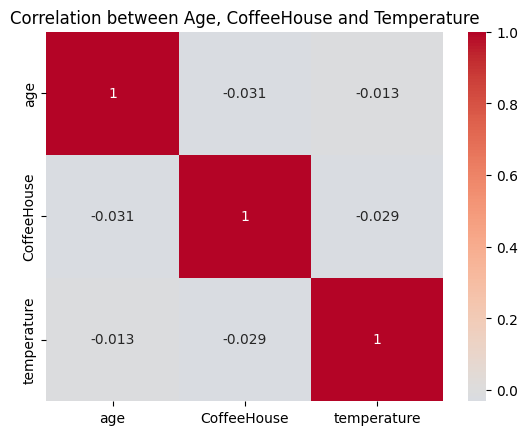

In [426]:
sns.heatmap(coffee_coupon[['age','CoffeeHouse','temperature']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Age, CoffeeHouse and Temperature')